# Module 3 Project - Whisky Sommelier
# EDA and Feature Engineering
By: **Maura Cerow**, **Rajeev Panwar** and **Bryan Santos**

This project aims to build the first module of a comprehensive whisky recommendation engine, an **automated whisky sommelier**. We would like this to act as a go-to "middle-man" between distributors, bars and consumers.

This notebook in particular handles the EDA and resulting feature engineering. The source is https://www.distiller.com.

## Dataset

After data cleaning, we have retained a total of 2,622 observations in our dataset. The following are our target and feature variables. We still plan to add some new predictors based on the resulting EDA and feature interactions. 

**Target**  
- Whisky's country of origin: 
    - Scotland
    - Japan
    - USA
    - Canada
    - Ireland

**Features**
- Type (whether it is Single Malt, Blended, Rye, etc.)
- Price (ranging from 1 to 5 with 5 being the most expensive)
- Expert Score (critic score)
- User Rating (distiller.com user reviews)
- ABV (Alcohol By Volume)
- Description
- Style (ingredients)
- Maturing/Cask (whether matured in Oak, Sherry, etc.)
- Flavor Profiles (each having intensity scores ranging from 0 to 100):
    - *Smoky*
    - *Peaty*
    - *Spicy*
    - *Herbal*
    - *Oily*
    - *Full-Bodied*
    - *Rich*
    - *Sweet*
    - *Briny*
    - *Salty*
    - *Vanilla*
    - *Tart*
    - *Fruity*
    - *Floral*

## Package Imports and Data Load

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mno

sns.set()
%matplotlib inline

### Suppress notebook warnings ###
import warnings
warnings.filterwarnings('ignore')

### Pandas settings to avoid exponential form and display all columns ###
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("whisky_df_clean.csv", sep=',')

In [3]:
df.head(5)

,name,type,price,expert_score,user_rating,description,abv,style,cask,review,smoky,peaty,spicy,herbal,oily,full-bodied,rich,sweet,briny,salty,vanilla,tart,fruity,floral,country
0,Hibiki 21 Year,Blended,5,99,4.520,Hibiki is the blended whisky brand produced by...,43.000,Comprised of both single malt(s) and single gr...,"ex-bourbon American oak, ex-sherry European oa...","""Tasting this whisky was one of those moments ...",30,30,50,30,20,80,80,85,0,15,20,25,85,50,4
1,Highland Park 18 Year,Peated Single Malt,4,99,4.490,Shudder to think that Highland Park 18 has onl...,43.000,100% malted barley from a single distillery. D...,ex-sherry,"""The sweet smoke is the underlying feature in ...",40,40,40,20,40,70,80,70,20,40,50,50,70,20,0
2,George T. Stagg Bourbon (Fall 2019),Bourbon,4,98,4.590,George T. Stagg Bourbon (Fall 2019) is an uncu...,58.450,Produced anywhere in USA; Mash bill of at leas...,"new, charred American oak","""Lots of oak shows up on the nose along with c...",40,40,65,50,20,60,60,45,0,0,60,60,45,0,1
3,Bowmore Mizunara Cask Finish,Peated Single Malt,5,98,4.190,This is the first-ever official Islay single m...,53.900,100% malted barley from a single distillery. D...,"ex-bourbon, ex-sherry, new Mizunara oak","""Though the time in Mizunara oak was relativel...",30,30,40,30,10,75,75,60,15,20,30,20,50,5,0
4,The Macallan M,Single Malt,5,98,4.190,A 6-litre Lalique decanter of this single malt...,47.700,Distilled in pot stills from 100% malted barle...,sherry oak casks,"""The aroma is that pleasing bouquet that comes...",50,50,60,0,15,90,100,50,0,0,20,20,80,10,0


## EDA

### Target variable - country of origin

In [4]:
df['country'].value_counts()

1    1192
0    1032
2     175
3     152
4     111
Name: country, dtype: int64

Text(0.5, 1, 'Whisky Distribution - Country of Origin')

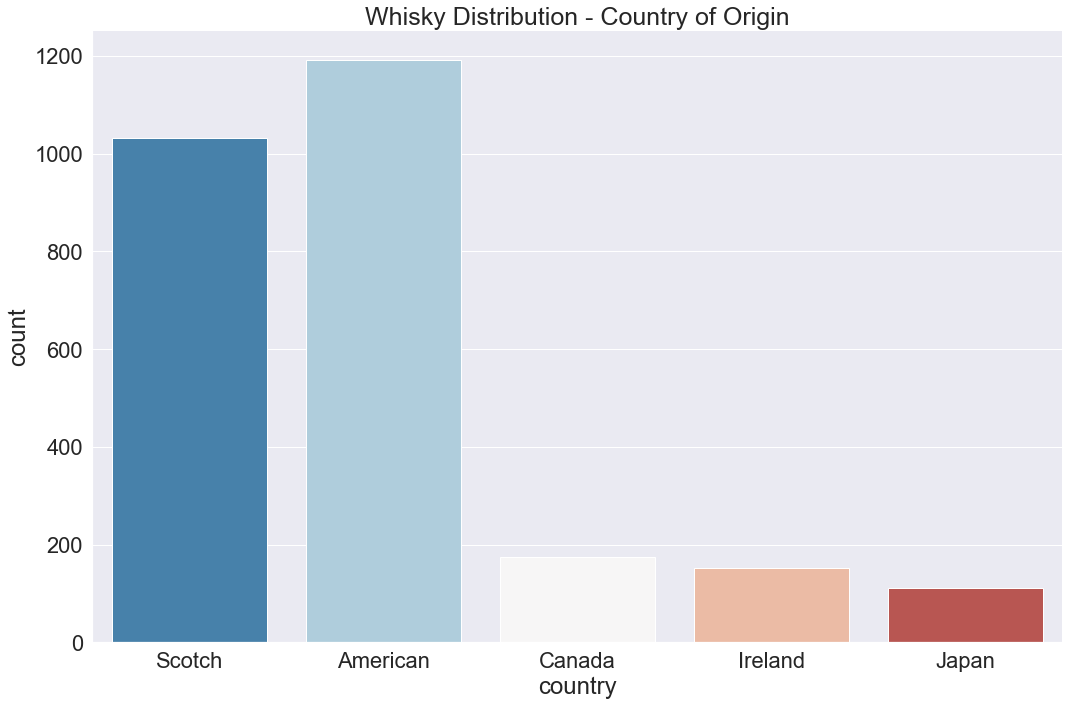

In [27]:
ax = sns.catplot(x="country", kind="count", palette="RdBu_r", data=df, height=10, aspect=15/10)
ax.set(xticklabels=['Scotch', 'American', 'Canada', 'Ireland', 'Japan'])
sns.set(font_scale=2)

plt.title('Whisky Distribution - Country of Origin', {'fontsize': 25})


Based on the value counts and on the graph above, there is indeed class imbalance. Scotch and American whiskies comprise majority of the observations in the dataset. To avoid class imbalance leading to inaccurate models and predictions, we will handle the imbalance later on using various techniques. Then we will compare the scores against models without imbalance handling to see if they are effective.

### Handling missing numeric values

In [6]:
df.describe()

,price,expert_score,user_rating,abv,smoky,peaty,spicy,herbal,oily,full-bodied,rich,sweet,briny,salty,vanilla,tart,fruity,floral,country
count,2662.000,2662.000,2587.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000,2662.000
mean,3.058,86.391,3.740,46.892,23.643,23.643,46.235,26.002,29.515,54.434,54.526,55.985,9.080,10.597,43.807,24.030,44.886,22.643,0.917
std,1.158,5.895,0.569,6.345,21.067,21.067,20.849,19.499,20.115,18.848,19.436,18.721,15.579,15.632,20.689,18.657,23.127,20.548,1.025
min,1.000,40.000,0.000,30.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,2.000,83.000,3.420,43.000,10.000,10.000,30.000,10.000,15.000,40.000,40.000,40.000,0.000,0.000,30.000,10.000,25.000,10.000,0.000
50%,3.000,87.000,3.760,46.000,20.000,20.000,50.000,20.000,30.000,55.000,60.000,60.000,0.000,5.000,40.000,20.000,40.000,20.000,1.000
75%,4.000,90.000,4.140,50.000,35.000,35.000,60.000,40.000,40.000,70.000,70.000,70.000,10.000,17.000,60.000,40.000,65.000,30.000,1.000
max,5.000,99.000,5.000,80.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,100.000,90.000,100.000,90.000,100.000,90.000,4.000


It seems only user rating has missing values based on our observation above. But there might be more to it than what meets the eye. Some user rating has a value of 0.00 which means it should have been null. 

The first step to address this is to convert all 0.00 values into nan. 

In [7]:
df.loc[df["user_rating"] == 0.000, "user_rating"] = np.NAN

A better way to analyze missing values is by drawing a nullity matrix.

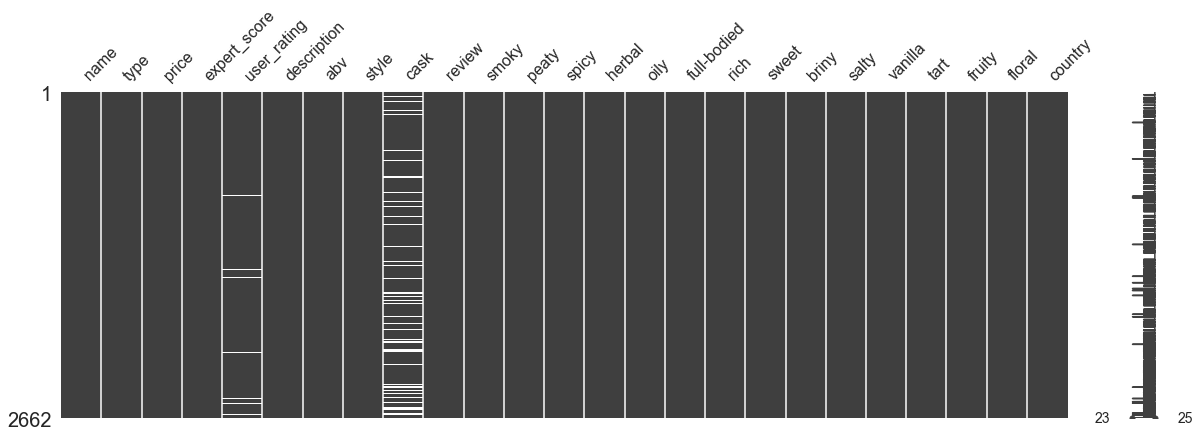

In [8]:
mno.matrix(df, figsize = (20, 6))

We also see that cask has missing values but since it is not yet numeric, we will deal with this later. Let us deal with user rating first using *imputation based on another semi-related variable*.

**Expert scores** and **user ratings** are both subjective quantitative review assessment of each whisky. The plan is to compute for the missing user ratings based on the expert score because we have complete expert score values. We will divide the expert score mean over user rating mean to get the weight of expert score in terms of user rating. To get the missing user rating, we will divide its expert score over the weight.



In [34]:
### Compure for the standard weight of expert scores against user ratings ###
weight = df['expert_score'].mean() / df['user_rating'].mean()

In [35]:
### Impute weighted user score if value is missing ###
df['user_rating'] = df.apply(
    lambda row: row['expert_score'] / weight if np.isnan(row['user_rating']) else row['user_rating'],
    axis=1
)

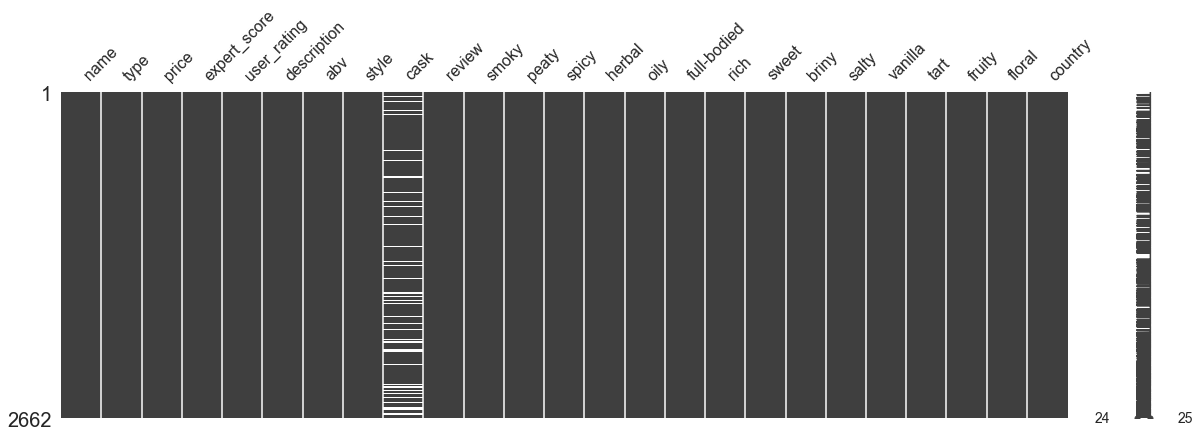

In [24]:
### Validate result ###
mno.matrix(df, figsize = (20, 6))

### Flavor profiles

In [28]:
df.columns

Index(['name', 'type', 'price', 'expert_score', 'user_rating', 'description',
       'abv', 'style', 'cask', 'review', 'smoky', 'peaty', 'spicy', 'herbal',
       'oily', 'full-bodied', 'rich', 'sweet', 'briny', 'salty', 'vanilla',
       'tart', 'fruity', 'floral', 'country'],
      dtype='object')

In [36]:
### Create a df of only the flavor profiles ###
flavor_df = df[['smoky', 'peaty', 'spicy', 'herbal',
       'oily', 'full-bodied', 'rich', 'sweet', 'briny', 'salty', 'vanilla',
       'tart', 'fruity', 'floral']]

In [30]:
### Check correlation ###
flavor_df.corr()

,smoky,peaty,spicy,herbal,oily,full-bodied,rich,sweet,briny,salty,vanilla,tart,fruity,floral
smoky,1.000,1.000,0.208,0.192,0.206,0.192,0.171,-0.069,0.441,0.407,0.072,0.126,0.063,0.044
peaty,1.000,1.000,0.208,0.192,0.206,0.192,0.171,-0.069,0.441,0.407,0.072,0.126,0.063,0.044
spicy,0.208,0.208,1.000,0.426,0.276,0.277,0.250,0.114,0.047,0.116,0.354,0.280,0.203,0.202
herbal,0.192,0.192,0.426,1.000,0.335,0.085,0.076,0.035,0.174,0.209,0.244,0.357,0.179,0.380
oily,0.206,0.206,0.276,0.335,1.000,0.305,0.279,0.113,0.306,0.318,0.289,0.260,0.203,0.269
full-bodied,0.192,0.192,0.277,0.085,0.305,1.000,0.844,0.436,0.123,0.183,0.303,0.066,0.233,0.084
rich,0.171,0.171,0.250,0.076,0.279,0.844,1.000,0.475,0.097,0.152,0.325,0.072,0.279,0.129
sweet,-0.069,-0.069,0.114,0.035,0.113,0.436,0.475,1.000,-0.051,0.049,0.477,0.119,0.446,0.257
briny,0.441,0.441,0.047,0.174,0.306,0.123,0.097,-0.051,1.000,0.781,0.013,0.139,0.107,0.153
salty,0.407,0.407,0.116,0.209,0.318,0.183,0.152,0.049,0.781,1.000,0.115,0.176,0.208,0.215


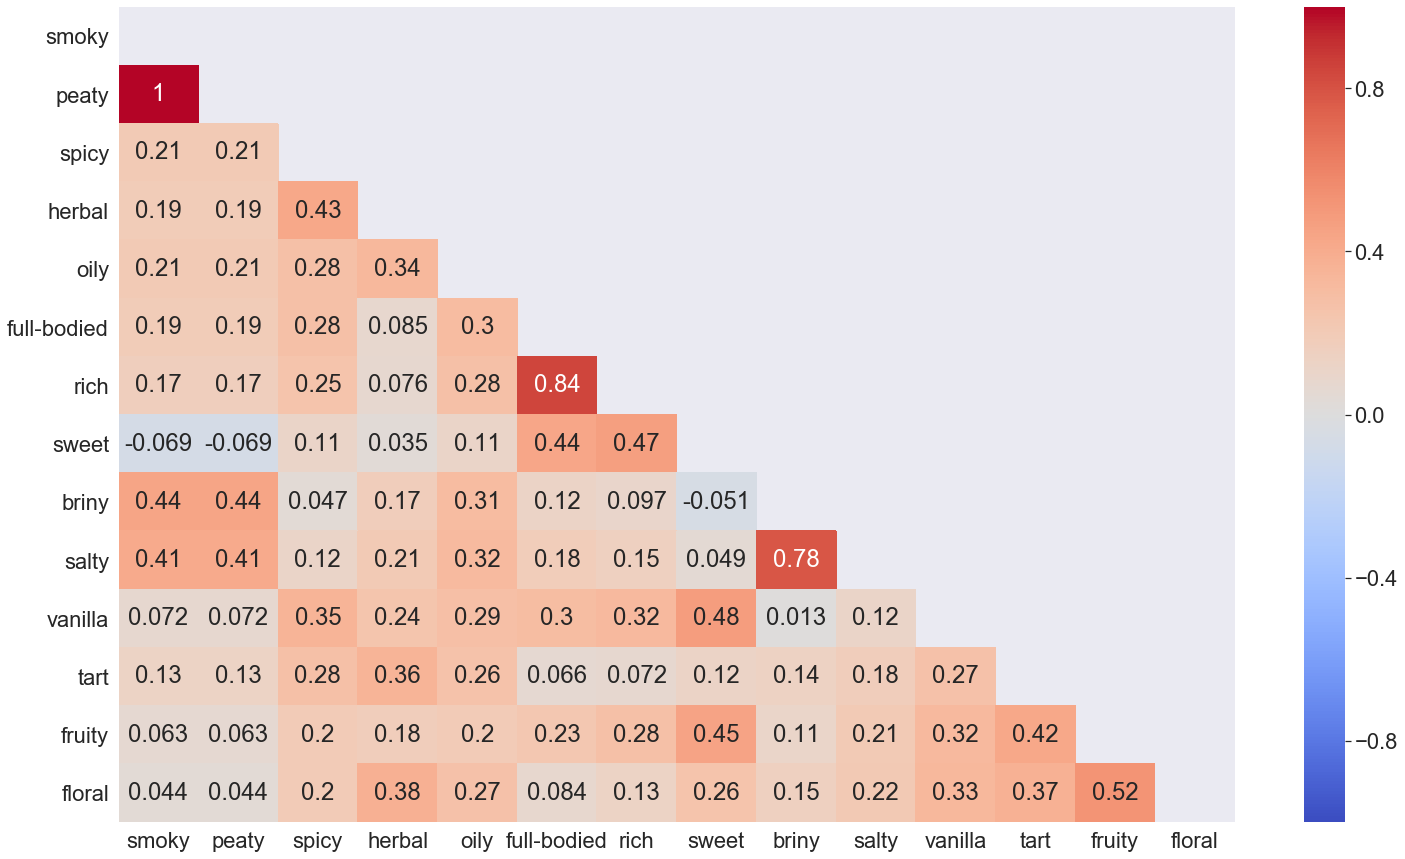

In [33]:
### Plot correlation between flavor profiles ###

f, ax = plt.subplots(figsize=(25, 15))
matrix = np.triu(flavor_df.corr())
sns.heatmap(flavor_df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', mask = matrix)